Proyecto de Data Science 1

Interpretación del Stroke Prediction Dataset (Kaggle.com):

Descripción general: Stroke Prediction Dataset contiene información sobre 2314 pacientes y su riesgo de sufrir un ACV (Accidente Cerebrovascular). El conjunto de datos incluye variables como:

ID: Identificador único del paciente.
Género: "Male", "Female" o "Other".
Edad: Edad del paciente.
Hipertensión: 0 si no tiene hipertensión, 1 si la tiene.
Enfermedad cardiaca: 0 si no tiene enfermedad cardiaca, 1 si la tiene.
Ever_married: "No" o "Yes".
Hábito de fumar: "No fuma", "Fumador actual" o "Ex fumador".
Resultado del ACV: 1 si ha sufrido un ACV, 0 si no.


Preguntas e hipótesis de interés sobre el dataset para predecir ataques cerebrovasculares

1.	¿Qué factores se asocian con un mayor riesgo de sufrir un ataque cerebrovascular?
¿Existe una relación entre la edad y el riesgo de ataque cerebrovascular?
¿El sexo de una persona influye en la probabilidad de sufrir un ataque cerebrovascular?
¿Ciertos hábitos o estilos de vida, como el tabaquismo, el consumo de alcohol o la falta de ejercicio, aumentan el riesgo de ataque cerebrovascular?
¿Hay una correlación entre la presión arterial, el colesterol o el nivel de azúcar en sangre y el riesgo de ataque cerebrovascular?
¿La presencia de otras enfermedades crónicas, como la diabetes o la hipertensión, aumenta la probabilidad de sufrir un ataque cerebrovascular?

2.	¿Es posible identificar grupos de población con mayor riesgo de sufrir un ataque cerebrovascular?
¿Se pueden identificar patrones en los datos que indiquen grupos de riesgo específicos?
¿Es posible desarrollar un modelo predictivo para identificar a las personas con mayor riesgo de sufrir un ataque cerebrovascular?



Hipótesis:
1.	La edad es un factor de riesgo significativo para el ataque cerebrovascular.
El riesgo de sufrir un ataque cerebrovascular aumenta con la edad.
2.	El sexo influye en la probabilidad de sufrir un ataque cerebrovascular.
3.	Ciertos hábitos o estilos de vida aumentan el riesgo de ataque cerebrovascular.
El tabaquismo, el consumo excesivo de alcohol y la falta de ejercicio están asociados con un mayor riesgo de ataque cerebrovascular.
4.	La presencia de otras enfermedades crónicas aumenta la probabilidad de sufrir un ataque cerebrovascular.
La diabetes, la hipertensión y otras enfermedades crónicas son factores de riesgo para el ataque cerebrovascular.
5.	Es posible identificar grupos de población con mayor riesgo de sufrir un ataque cerebrovascular.
Se pueden identificar patrones en los datos que indiquen grupos de riesgo específicos.
Se puede desarrollar un modelo predictivo para identificar a las personas con mayor riesgo de sufrir un ataque cerebrovascular.


In [129]:
from google.colab import drive
import os
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [132]:
%cd '/content/gdrive/MyDrive/Data Science 1'

/content/gdrive/MyDrive/Data Science 1


In [133]:
%ls

healthcare-dataset-stroke-data.csv  LourdesLoisi.ipynb


In [134]:
file_path = "healthcare-dataset-stroke-data.csv"
sheet_name = "healthcare-dataset-stroke-data.csv"

In [135]:
df = pd.read_csv(file_path)

In [130]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0.0997,0.055255,Yes,Private,Urban,228.69,36.6,formerly smoked,0.04965
1,51676,Female,61.0,0.0997,0.055255,Yes,Self-employed,Rural,202.21,28.0,never smoked,0.04965
2,31112,Male,80.0,0.0997,0.055255,Yes,Private,Rural,105.92,32.5,never smoked,0.04965
3,60182,Female,49.0,0.0997,0.055255,Yes,Private,Urban,171.23,34.4,smokes,0.04965
4,1665,Female,79.0,0.0997,0.055255,Yes,Self-employed,Rural,174.12,24.0,never smoked,0.04965
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,0.0997,0.055255,Yes,Private,Urban,83.75,28.0,never smoked,0.04965
5106,44873,Female,81.0,0.0997,0.055255,Yes,Self-employed,Urban,125.20,40.0,never smoked,0.04965
5107,19723,Female,35.0,0.0997,0.055255,Yes,Self-employed,Rural,82.99,30.6,never smoked,0.04965
5108,37544,Male,51.0,0.0997,0.055255,Yes,Private,Rural,166.29,25.6,formerly smoked,0.04965


# Deshacerme de los nulos



In [111]:
#Analizo en donde se encuentran los valores nulos en mi Dataset
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [136]:
# Calcula el promedio de la columna "bmi_"
promedio_bmi = df["bmi"].mean()

# Redondea el promedio a 1 decimal
promedio_bmi = np.floor(promedio_bmi)

# Reemplaza los valores faltantes con el promedio redondeado
df["bmi"].fillna(promedio_bmi, inplace=True)


In [137]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.0,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.0,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


Empezar a probar graficos

In [114]:
variables = ['hypertension', 'stroke', 'heart_disease']
grouped_data = df.groupby('age')[variables].mean().reset_index()
grouped_data

,age,hypertension,stroke,heart_disease
0,0.08,0.000000,0.000000,0.000000
1,0.16,0.000000,0.000000,0.000000
2,0.24,0.000000,0.000000,0.000000
3,0.32,0.000000,0.000000,0.000000
4,0.40,0.000000,0.000000,0.000000
...,...,...,...,...
99,78.00,0.235294,0.205882,0.196078
100,79.00,0.200000,0.200000,0.223529
101,80.00,0.300000,0.242857,0.242857
102,81.00,0.266667,0.233333,0.216667


Aca me di cuenta que tenía problemas para agrupar por edades, que habian valores extraños. Asi que procedí a corregirlo.
Existian edades como 0,15 entre otras.

In [115]:
#esta línea de código conservará solo los registros donde la variable "age" sea un entero o un decimal con cero dígitos.
def is_int_or_int_with_zero_decimals(x):
  return isinstance(x, int) or (isinstance(x, float) and x.is_integer())

df = df[df['age'].apply(is_int_or_int_with_zero_decimals)]

In [116]:
print(df['age'].unique())

[67. 61. 80. 49. 79. 81. 74. 69. 59. 78. 54. 50. 64. 75. 60. 57. 71. 52.
 82. 65. 58. 42. 48. 72. 63. 76. 39. 77. 73. 56. 45. 70. 66. 51. 43. 68.
 47. 53. 38. 55. 46. 32. 14.  3.  8. 37. 40. 35. 20. 44. 25. 27. 23. 17.
 13.  4. 16. 22. 30. 29. 11. 21. 18. 33. 24. 34. 36. 41.  5. 26. 31.  7.
 12. 62.  2.  9. 15. 28. 10. 19.  6.  1.]


# Graficos con Matplotlib

In [117]:
#calculo un DataFrame resultante (grouped_data) que contiene los valores promedio de 'hipertensión', 'accidente cerebrovascular' y 'enfermedad cardíaca' para cada grupo de edad.
grouped_data = df.groupby('age')['hypertension', 'stroke', 'heart_disease'].mean().reset_index()
grouped_data

<ipython-input-117-56d3695260f3>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped_data = df.groupby('age')['hypertension', 'stroke', 'heart_disease'].mean().reset_index()


,age,hypertension,stroke,heart_disease
0,1.0,0.000000,0.000000,0.000000
1,2.0,0.000000,0.000000,0.018182
2,3.0,0.000000,0.000000,0.000000
3,4.0,0.000000,0.000000,0.000000
4,5.0,0.000000,0.000000,0.000000
...,...,...,...,...
77,78.0,0.235294,0.205882,0.196078
78,79.0,0.200000,0.200000,0.223529
79,80.0,0.300000,0.242857,0.242857
80,81.0,0.266667,0.233333,0.216667


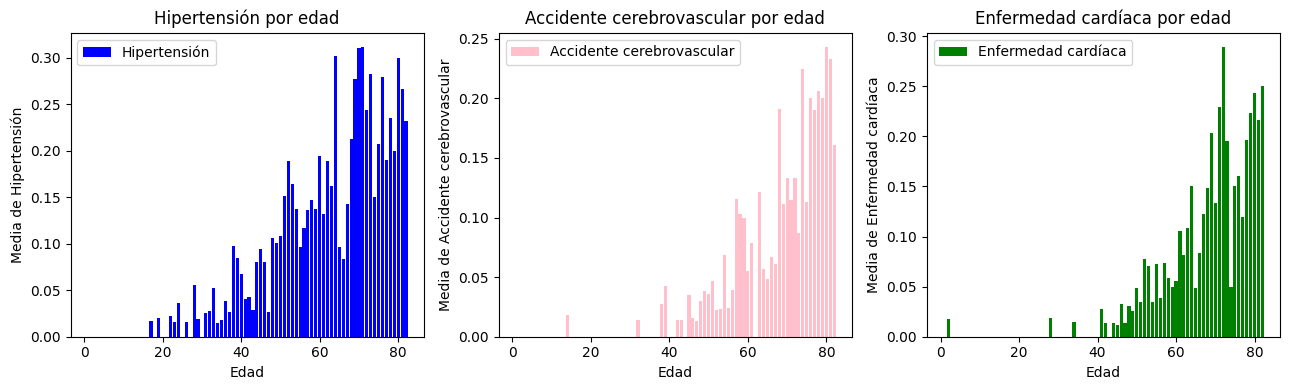

In [118]:
fig, axs = plt.subplots(1, 3, figsize=(13, 4))

# Gráfico de barras para 'hypertension'
axs[0].bar(grouped_data['age'], grouped_data['hypertension'], color='blue', label='Hipertensión')
axs[0].set_xlabel('Edad')
axs[0].set_ylabel('Media de Hipertensión')
axs[0].set_title('Hipertensión por edad')
axs[0].legend()

# Gráfico de barras para 'stroke'
axs[1].bar(grouped_data['age'], grouped_data['stroke'], color='pink', label='Accidente cerebrovascular')
axs[1].set_xlabel('Edad')
axs[1].set_ylabel('Media de Accidente cerebrovascular')
axs[1].set_title('Accidente cerebrovascular por edad')
axs[1].legend()

# Gráfico de barras para 'heart_diseases'
axs[2].bar(grouped_data['age'], grouped_data['heart_disease'], color='green', label='Enfermedad cardíaca')
axs[2].set_xlabel('Edad')
axs[2].set_ylabel('Media de Enfermedad cardíaca')
axs[2].set_title('Enfermedad cardíaca por edad')
axs[2].legend()

plt.tight_layout()
plt.show()


Podemos observar en los gráficos que tanto el riesgo de accidentes cardiovasculares, el riesgo de sufrir hipertención y el riesgo de padecer una enfermedad cardiaca aumentan con la edad.
Existe una correlacion positiva entre las variables. Todas crecen simultaneamente.

# Grafico un histograma de la variable “stroke” para entender la proporción de pacientes que sufren un infarto.

(array([9.5035035, 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.4964965]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

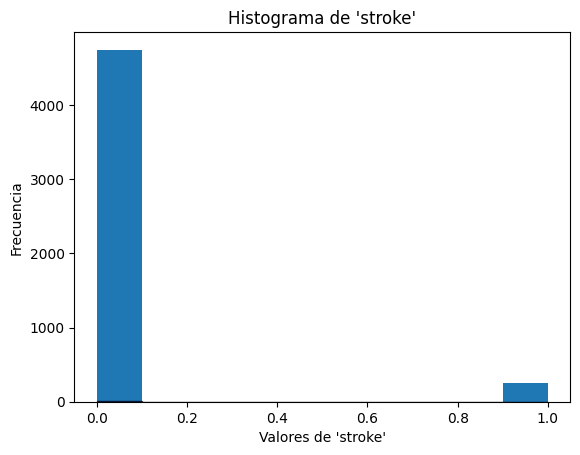

In [119]:
# Seleccionar la columna "stroke"
stroke_data = df["stroke"]

# Crear el histograma
plt.hist(stroke_data)

# Agregar etiquetas y título
plt.xlabel("Valores de 'stroke'")
plt.ylabel("Frecuencia")
plt.title("Histograma de 'stroke'")

plt.hist(stroke_data, bins=10, density=True, color='blue', edgecolor='black', alpha=0.7)



Distribución de valores:

La mayoría de los pacientes tienen un valor de "stroke" igual a 0, lo que significa que no han sufrido un infarto.
Hay una pequeña proporción de pacientes con valores de "stroke" igual a 1, lo que significa que sí, han sufrido un infarto.

# Calculo del porcentaje de pacientes que sufrieron un infarto (stroke)

In [120]:
# Contar el número total de pacientes
total_patients = df.shape[0]

# Contar el número de pacientes con "stroke"
stroke_patients = df.loc[df["stroke"] > 0].shape[0]

# Calcular el porcentaje de pacientes con "stroke"
percentage = (stroke_patients / total_patients) * 100

# Imprimir el resultado
print("Porcentaje de pacientes con 'stroke':", percentage)

Porcentaje de pacientes con 'stroke': 4.964964964964965


# Grafico boxplots de las características numéricas "age", “avg_glucose_level” y “bmi”, divididos por la variable objetivo “stroke”, para observar cómo se distribuyen estas características entre los pacientes que sufren un infarto y los que no.

<ipython-input-121-c0abd53d09f3>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="stroke", y=variable, palette=["#D58776", "#87D576"])


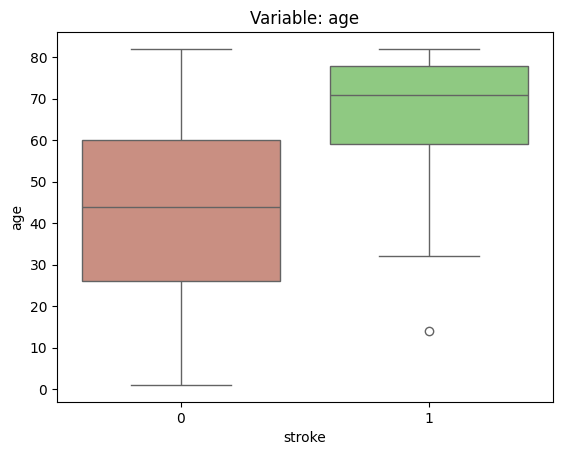

<ipython-input-121-c0abd53d09f3>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="stroke", y=variable, palette=["#D58776", "#87D576"])


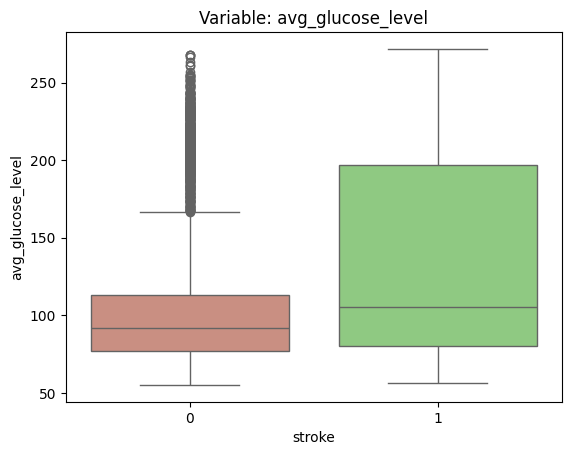

<ipython-input-121-c0abd53d09f3>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="stroke", y=variable, palette=["#D58776", "#87D576"])


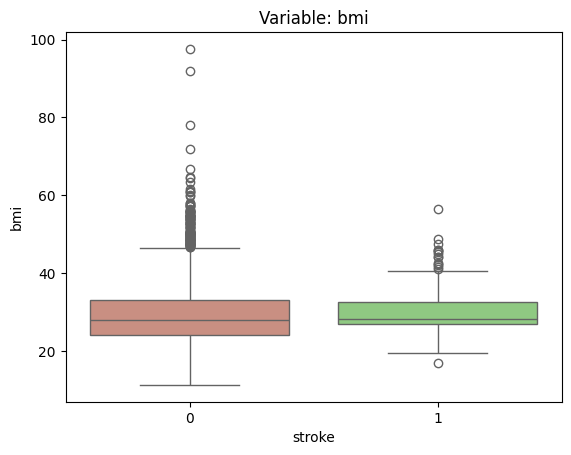

In [121]:
# Lista de variables numéricas
variables_numericas = ["age", "avg_glucose_level", "bmi"]

infarto = df[df["stroke"] == 1]
no_infarto = df[df["stroke"] == 0]

# Bucle para graficar boxplots de todas las variables numéricas
for variable in variables_numericas:
    sns.boxplot(data=df, x="stroke", y=variable, palette=["#D58776", "#87D576"])
    plt.title(f"Variable: {variable}")
    plt.show()


In [122]:
# Seleccionar pacientes que sufrieron un infarto
infarto = df[df["stroke"] == 1]

# Calcular la media de las variables "age", "avg_glucose_level" y "bmi"
medias_infarto = infarto[["age", "avg_glucose_level", "bmi"]].mean()

print(f"Medias para pacientes con infarto: {medias_infarto}")

Medias para pacientes con infarto: age                   67.995968
avg_glucose_level    132.795444
bmi                   30.082661
dtype: float64


In [123]:
# Seleccionar pacientes que no sufrieron un infarto
noinfarto = df[df["stroke"] == 0]

# Calcular la media de las variables "age", "avg_glucose_level" y "bmi"
medias_noinfarto = noinfarto[["age", "avg_glucose_level", "bmi"]].mean()

print(f"Medias para pacientes con noinfarto: {medias_noinfarto}")

Medias para pacientes con noinfarto: age                   42.952391
avg_glucose_level    105.022311
bmi                   29.035075
dtype: float64



***Insights de los boxplots:***

**1. Relación entre edad e infarto:**
Los pacientes que sufrieron un infarto son significativamente mayores que aquellos que no lo han sufrido. La mediana de edad en el grupo con infarto es de 68 años, mientras que en el grupo sin infarto es de 42 años. Esto sugiere que la edad es un factor de riesgo importante para sufrir un infarto.

**2. Relación entre nivel medio de glucosa e infarto:**
Los pacientes que sufrieron un infarto tienen un nivel medio de glucosa significativamente mayor que aquellos que no lo han sufrido. La mediana del nivel medio de glucosa en el grupo con infarto es de 133 mg/dL, mientras que en el grupo sin infarto es de 105 mg/dL. Esto indica que un nivel elevado de glucosa en sangre puede ser un factor de riesgo para sufrir un infarto.

**3. Relación entre BMI e infarto:**
Los pacientes que sufrieron un infarto tienen un IMC significativamente mayor que aquellos que no lo han sufrido. La mediana del IMC en el grupo con infarto es de 30 kg/m², mientras que en el grupo sin infarto es de 29 kg/m². Esto sugiere que la obesidad puede ser un factor de riesgo importante para sufrir un infarto.

# Gráficos de violín para comparar las distribuciones de características numéricas entre los pacientes que sufren un infarto y los que no.

<ipython-input-124-3845bdce9923>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="stroke", y=variable, data=df, split=True, inner="quart", palette="Set2", ax=axes[i])
<ipython-input-124-3845bdce9923>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="stroke", y=variable, data=df, split=True, inner="quart", palette="Set2", ax=axes[i])
<ipython-input-124-3845bdce9923>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="stroke", y=variable, data=df, split=True, inner="quart", palette="Set2", ax=axes[i])


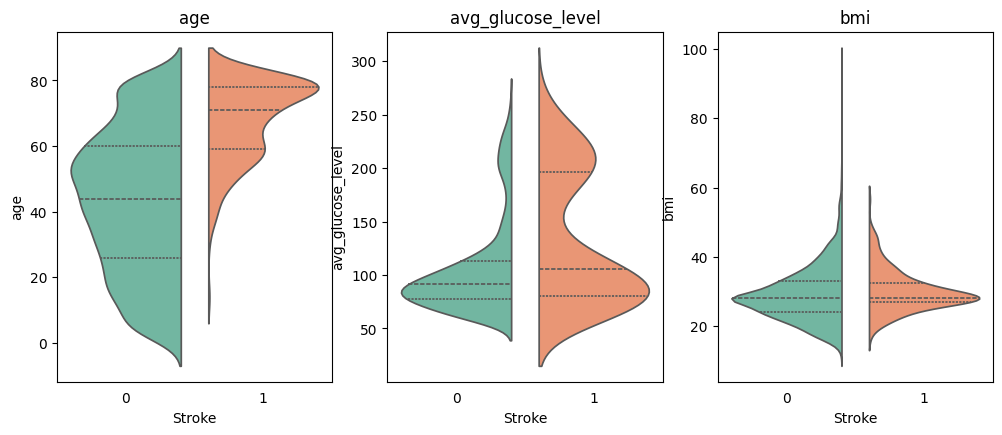

In [124]:
# Crear un subplot para colocar múltiples gráficos de violín
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 5))  # Ajusta el tamaño según sea necesario

# Recorremos las variables deseadas
variables = ["age", "avg_glucose_level", "bmi"]

for i, variable in enumerate(variables):
  # Crear gráficos de violín con distribuciones separadas
  sns.violinplot(x="stroke", y=variable, data=df, split=True, inner="quart", palette="Set2", ax=axes[i])
  # Personaliza los títulos de cada eje (opcional)
  axes[i].set_title(variable)
  # Etiqueta para "stroke" (opcional)
  axes[i].set_xlabel("Stroke")
  axes[i].tick_params(bottom=False)  # Ocultar las etiquetas del eje x inferior

# Ajusta el espacio entre subplots (opcional)
plt.subplots_adjust(left=0.12, right=0.9, top=0.9, bottom=0.2)

# Muestra el gráfico completo
plt.show()


Los pacientes que sufrieron un infarto son, en promedio, mayores, tienen un nivel medio de glucosa más alto y un BMI más alto que los pacientes que no sufrieron un infarto.

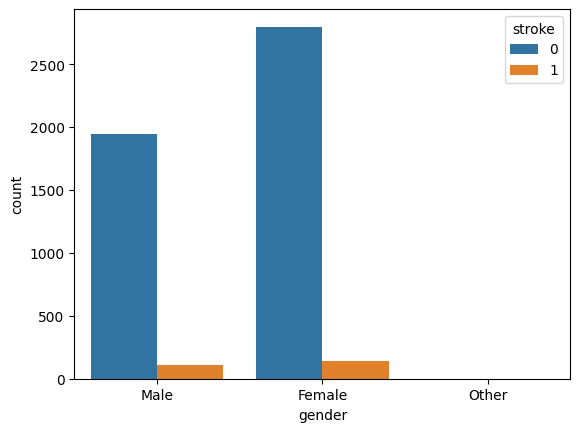

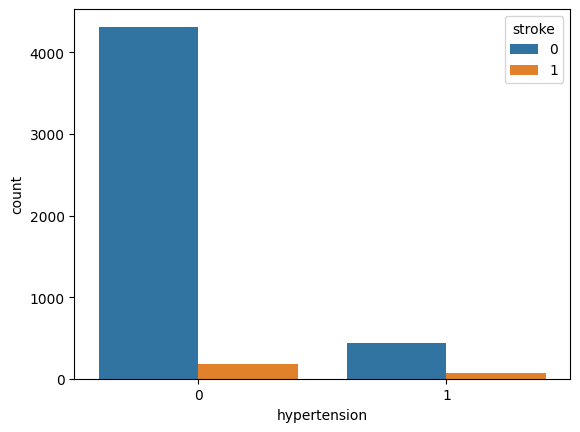

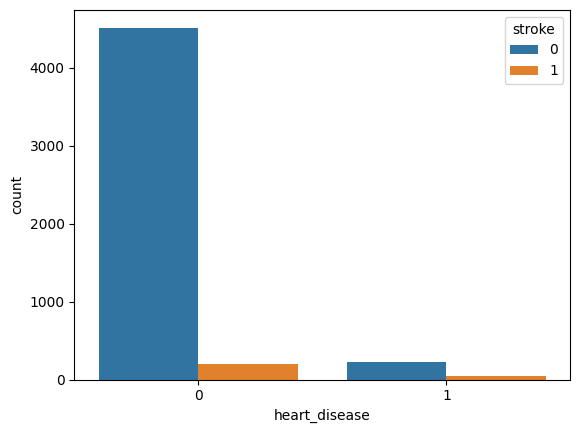

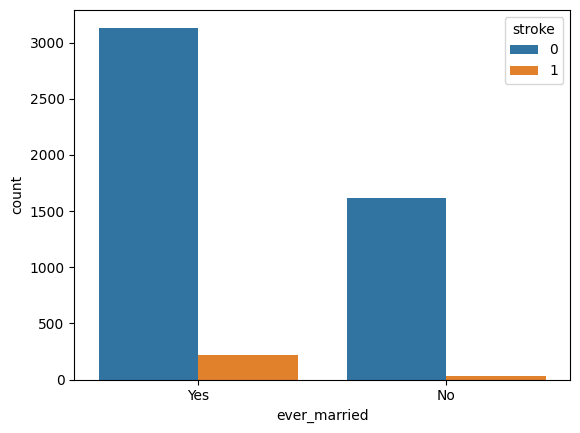

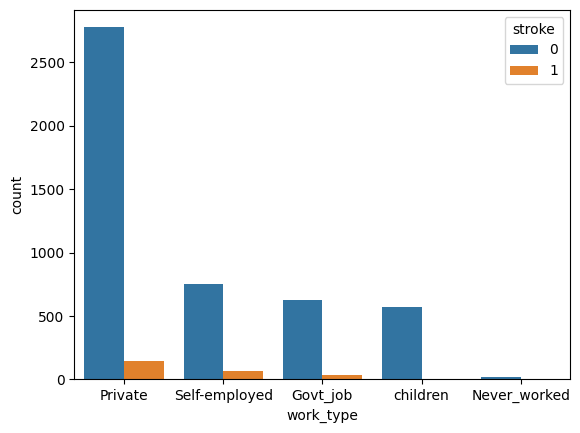

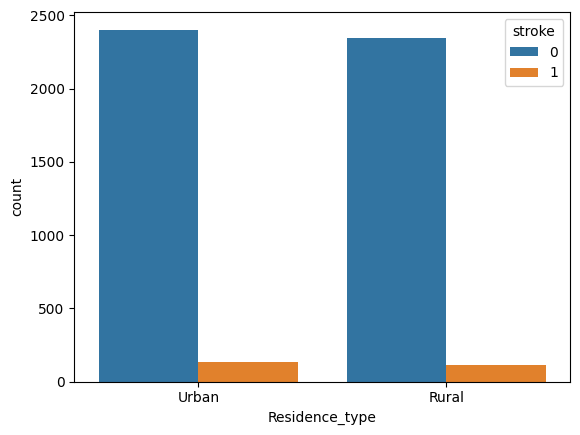

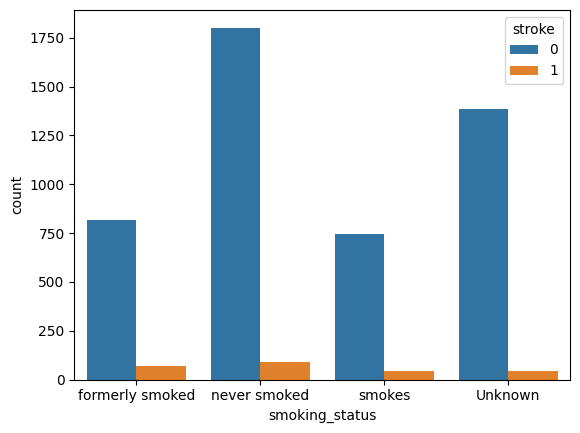

In [125]:
# Crear un gráfico de barras para cada variable categórica
for variable in ["gender", "hypertension", "heart_disease", "ever_married", "work_type", "Residence_type", "smoking_status"]:
  sns.countplot(x=variable, hue="stroke", data=df)
  plt.show()

Concluciones basadas en los graficos.

*Variables determinantes para el analisis*
*  La proporción de mujeres con accidente cerebrovascular es mayor que la de hombres.
*   La proporción de personas con hipertensión que han sufrido un accidente cerebrovascular es mayor que la de personas sin hipertensión.
*   La proporción de personas con enfermedad cardíaca que han sufrido un accidente cerebrovascular es mayor que la de personas sin enfermedad cardíaca.
*   La proporción de personas que viven en zonas rurales que han sufrido un accidente cerebrovascular es mayor que la de personas que viven en zonas urbanas.
*   La proporción de fumadores que han sufrido un accidente cerebrovascular es mayor que la de personas que no fuman.

*Variables no determinantes para el analisis*
*   La proporción de personas casadas que han sufrido un accidente cerebrovascular es similar a la de personas solteras.
*   La distribución del tipo de trabajo es similar entre las personas que han sufrido un accidente cerebrovascular y las que no.







# Calcular la matriz de correlación entre todas las variables numéricas y la variable objetivo “stroke”, y visualizarla en un mapa de calor. Esto te ayudará a identificar relaciones lineales o de dependencia entre las características y el riesgo de infarto.

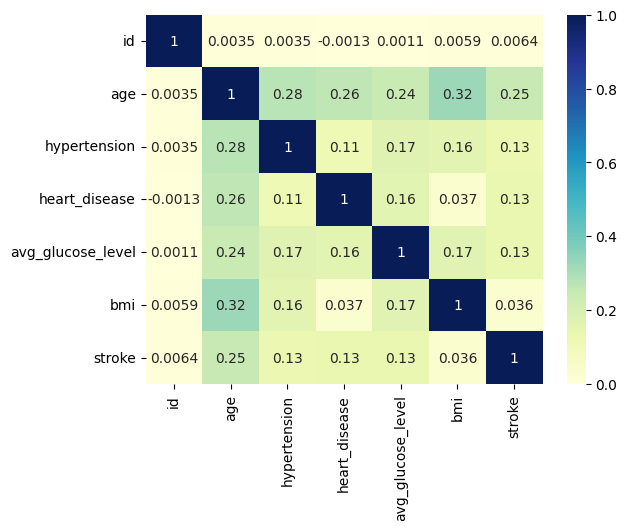

In [139]:
numeric_features = df.select_dtypes(include=["number"])
correlation_matrix = numeric_features.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu")
plt.show()